<a href="https://colab.research.google.com/github/nattrio/Python-Practice/blob/master/Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment

## Import Library

In [761]:
import warnings
warnings.filterwarnings('ignore')

# File
import os
from google.colab import drive
drive.mount('/content/drive')

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

# Implementation
import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Dataset

In [762]:
# ติดตั้งภาษาไทย

!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [763]:
dataset = pd.read_excel('/content/drive/Shared drives/D-Day_Project/วิเคราะห์ข้อมูล/Colab/Regression/BSCIT50-59 GRADES-BLINDED.xlsx')

In [764]:
# dataset.head()

In [765]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Yr                                       599 non-null    int64  
 1   Program                                  599 non-null    object 
 2   โครงการ                                  339 non-null    object 
 3   School GPAX                              599 non-null    float64
 4   คณิตศาสตร์                               238 non-null    float64
 5   วิทยาศาสตร์                              238 non-null    float64
 6   ภาษาต่างประเทศ                           309 non-null    float64
 7   คะแนนสอบสัมภาษณ์                         71 non-null     float64
 8   SIT GPAX in 1/59                         599 non-null    float64
 9   Predicted GPAX using all students model  599 non-null    float64
 10  สถานศึกษา                                599 non-n

## EDA

In [766]:
n_bins = 8

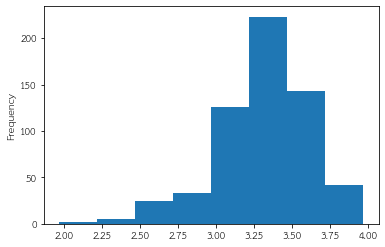

In [767]:
dataset['School GPAX'].plot.hist(bins=n_bins)

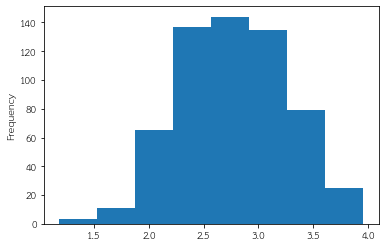

In [768]:
dataset['SIT GPAX in 1/59'].plot.hist(bins=n_bins)

## Data Preprocessing

In [769]:
# Define function

def inputClass(score):
  if score >= 3.5:
    return 5
  elif score >= 3:
    return 4
  elif score >= 2.5:
    return 3
  elif score >= 2:
    return 2
  else:
    return 1

def outputClass(score):
  if score >= 3.5:
    return 5
  elif score >= 3:
    return 4
  elif score >= 2.5:
    return 3
  elif score >= 2:
    return 2
  else:
    return 1

In [770]:
df = dataset
# df = df.dropna(subset=["ภาษาต่างประเทศ", "คณิตศาสตร์", "วิทยาศาสตร์"])

# หลังจาก drop แล้ว ให้เรียง index ใหม่
df.index = range(len(df))

In [771]:
len(df)

599

In [772]:
# School GPAX to class

df["School_class"] = df["School GPAX"] # สร้าง column ใหม่ชื่อ School_class โดย copy จาก School GPAX

In [773]:
for i in range(len(df)):
  df["School_class"][i] = inputClass(df["School GPAX"][i])
df["School_class"] = pd.to_numeric(df["School_class"])

In [774]:
# School SIT to class

df["SIT_class"] = df["SIT GPAX in 1/59"]

for i in range(len(df)):
  df["SIT_class"][i] = outputClass(df["SIT GPAX in 1/59"][i])
df["SIT_class"] = pd.to_numeric(df["SIT_class"])

In [775]:
# Subject to class

df["math_class"] = df["คณิตศาสตร์"]
df["sci_class"] = df["วิทยาศาสตร์"]
df["eng_class"] = df["ภาษาต่างประเทศ"]

for i in range(len(df)):
  df["math_class"][i] = inputClass(df["คณิตศาสตร์"][i])
df["math_class"] = pd.to_numeric(df["math_class"])

for i in range(len(df)):
  df["sci_class"][i] = inputClass(df["วิทยาศาสตร์"][i])
df["sci_class"] = pd.to_numeric(df["sci_class"])

for i in range(len(df)):
  df["eng_class"][i] = inputClass(df["ภาษาต่างประเทศ"][i])
df["eng_class"] = pd.to_numeric(df["eng_class"])

In [776]:
df.head()

,Yr,Program,โครงการ,School GPAX,คณิตศาสตร์,วิทยาศาสตร์,ภาษาต่างประเทศ,คะแนนสอบสัมภาษณ์,SIT GPAX in 1/59,Predicted GPAX using all students model,สถานศึกษา,จังหวัดสถานศึกษา,เขตสถานศึกษา,School_class,SIT_class,math_class,sci_class,eng_class
0,57,BScIT,เรียนดี,3.27,NaN,NaN,2.91,3.11,1.98,2.73691,S000-0,กรุงเทพมหานคร,ทุ่งครุ,4.0,1.0,1.0,1.0,3.0
1,57,BScIT,เรียนดี,3.47,NaN,NaN,3.84,3.48,2.53,2.82351,S001-0,ปราจีนบุรี,NaN,4.0,3.0,1.0,1.0,5.0
2,59,BScIT,เรียนดี,3.64,3.67,3.66,3.47,NaN,3.06,2.89712,S002-0,กรุงเทพมหานคร,หนองแขม,5.0,4.0,5.0,5.0,4.0
3,59,BScIT,เรียนดี,3.40,3.45,3.41,3.30,NaN,2.25,2.79320,S002-0,กรุงเทพมหานคร,หนองแขม,4.0,2.0,4.0,4.0,4.0
4,57,BScIT,เรียนดี,3.40,NaN,NaN,2.90,3.32,2.70,2.79320,S002-0,กรุงเทพมหานคร,หนองแขม,4.0,3.0,1.0,1.0,3.0


### Splitting Data

In [777]:
# X = np.array(df[['School_class', "math_class", "eng_class", "sci_class"]]) 
X = np.array(df[['School_class']]) # .reshape(1,-1)
y = np.array(df['SIT_class'])

In [778]:
len(X)

599

In [779]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8) # train size 0.8 คือ แบ่งไว้เทรน 80%

In [780]:
print(len(X_train))
print(len(X_test))

479
120


## Modelling

### K-fold

In [781]:
KNN = KNeighborsClassifier(n_neighbors=3)
RFC = RandomForestClassifier(n_estimators=50,random_state=1)
LG  = LogisticRegression(random_state=0)
DTC = DecisionTreeClassifier(random_state=0)
MLP = MLPClassifier(random_state=0)

In [782]:
knn_score = []
rfc_score = []
lg_score  = []
dtc_score  = []
mlp_score  = []

In [783]:
def kfold_score(model):
  model.fit(X_train_k,y_train_k)
  pred = model.predict(X_test_k)
  accur = accuracy_score(y_test_k,pred)
  return accur

In [784]:
n_splits = 5
cv = KFold(n_splits)

In [785]:
for train_index, test_index in cv.split(X):
    X_train_k, y_train_k = X[train_index], y[train_index]
    X_test_k, y_test_k   = X[test_index], y[test_index]

    # KNN.fit(X_train_k,y_train_k)
    # RFC.fit(X_train_k,y_train_k)
    # LG.fit(X_train_k,y_train_k)
    # DTC.fit(X_train_k,y_train_k)

    # pred_KNN=KNN.predict(X_test_k)
    # pred_RFC=RFC.predict(X_test_k)
    # pred_LG=LG.predict(X_test_k)
    # pred_DTC=DTC.predict(X_test_k)

    # accur_KNN=accuracy_score(y_test_k,pred_KNN)
    # accur_RFC=accuracy_score(y_test_k,pred_RFC)
    # accur_LG=accuracy_score(y_test_k,pred_LG)
    # accur_DTC=accuracy_score(y_test_k,pred_DTC)

    knn_score.append(kfold_score(KNN))
    rfc_score.append(kfold_score(RFC))
    lg_score.append(kfold_score(LG))
    dtc_score.append(kfold_score(DTC))
    mlp_score.append(kfold_score(MLP))

In [786]:
def show_score(model_name,score):
  print(model_name)
  print("-" * len(model_name))
  print("Mean:\t",np.mean(score))
  print("Max:\t",np.max(score))
  print("Min:\t",np.min(score))
  print("S.D.:\t",np.std(score))
  print(score,"\n")

In [787]:
show_score("KNeighborsClassifier", knn_score)
show_score("RandomForestClassifier", rfc_score)
show_score("LogisticRegression", lg_score)
show_score("DecisionTreeClassifier", dtc_score)
show_score("MLPClassifier", mlp_score)

KNeighborsClassifier
--------------------
Mean:	 0.18056022408963585
Max:	 0.33613445378151263
Min:	 0.09166666666666666
S.D.:	 0.08894912223943707
[0.20833333333333334, 0.09166666666666666, 0.16666666666666666, 0.1, 0.33613445378151263] 

RandomForestClassifier
----------------------
Mean:	 0.3688795518207283
Max:	 0.4083333333333333
Min:	 0.325
S.D.:	 0.03564437051816634
[0.325, 0.4, 0.4083333333333333, 0.38333333333333336, 0.3277310924369748] 

LogisticRegression
------------------
Mean:	 0.37554621848739494
Max:	 0.4166666666666667
Min:	 0.325
S.D.:	 0.04050945586216677
[0.325, 0.4, 0.4083333333333333, 0.4166666666666667, 0.3277310924369748] 

DecisionTreeClassifier
----------------------
Mean:	 0.3638375350140056
Max:	 0.4083333333333333
Min:	 0.3025210084033613
S.D.:	 0.04227471266751182
[0.325, 0.4, 0.4083333333333333, 0.38333333333333336, 0.3025210084033613] 

MLPClassifier
-------------
Mean:	 0.3604201680672269
Max:	 0.4166666666666667
Min:	 0.25210084033613445
S.D.:	 0.06326

## Evaluation

In [788]:
MLP = MLPClassifier(random_state=0) # สร้างโมเดลเปล่า
MLP.fit(X_train,y_train) # เอามาเทรน
y_pred = MLP.predict(X_test) # เอาโมเดลที่เทรนแล้วไปทำนาย X_test แล้วใส่ใน y_pred

In [789]:
MLP.score(X_train,y_train)

0.3736951983298539

In [790]:
accuracy_score(y_test, y_pred)

0.38333333333333336

In [791]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.50      0.21      0.30        28
         3.0       0.37      0.89      0.52        45
         4.0       0.00      0.00      0.00        31
         5.0       0.00      0.00      0.00        11

    accuracy                           0.38       120
   macro avg       0.17      0.22      0.16       120
weighted avg       0.26      0.38      0.27       120



In [792]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 0,  1,  4,  0,  0],
       [ 0,  6, 22,  0,  0],
       [ 0,  5, 40,  0,  0],
       [ 0,  0, 31,  0,  0],
       [ 0,  0, 11,  0,  0]])

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdce8496110>,)

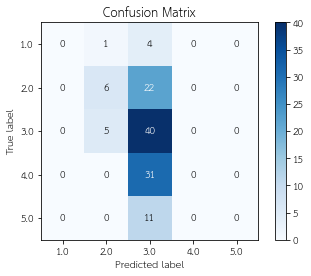

In [793]:
! pip install -q scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred),
    #figsize=(12,12))

In [794]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
# ทำ cross_val_score โดยใช้โมเดลเปล่า clf มาทำสอบใน k-fold แบ่งเป็น 5 fold
show_score("MLP", scores)

MLP
---
Mean:	 0.36328947368421055
Max:	 0.37894736842105264
Min:	 0.3541666666666667
S.D.:	 0.009110093621165247
[0.36458333 0.35416667 0.36458333 0.35416667 0.37894737] 



In [795]:
for i in range(len(matrix)):
  class_num = i+1
  print("Class {} ({})".format(class_num, matrix[i].sum()))
  for n in range(len(matrix[i])):
    pred_num = n+1
    score = matrix[i][n]
    # print(" - predict Class {}: {}".format(pred_num, score))
    # print(" - predict Class {}: {:.0%}".format(pred_num, score/matrix[i].sum()))
    if i==n:
      print(">> predict Class {}: {:0.2f}".format(pred_num, score/matrix[i].sum()))
    else:
      print(" - predict Class {}: {:0.2f}".format(pred_num, score/matrix[i].sum()))

Class 1 (5)
>> predict Class 1: 0.00
 - predict Class 2: 0.20
 - predict Class 3: 0.80
 - predict Class 4: 0.00
 - predict Class 5: 0.00
Class 2 (28)
 - predict Class 1: 0.00
>> predict Class 2: 0.21
 - predict Class 3: 0.79
 - predict Class 4: 0.00
 - predict Class 5: 0.00
Class 3 (45)
 - predict Class 1: 0.00
 - predict Class 2: 0.11
>> predict Class 3: 0.89
 - predict Class 4: 0.00
 - predict Class 5: 0.00
Class 4 (31)
 - predict Class 1: 0.00
 - predict Class 2: 0.00
 - predict Class 3: 1.00
>> predict Class 4: 0.00
 - predict Class 5: 0.00
Class 5 (11)
 - predict Class 1: 0.00
 - predict Class 2: 0.00
 - predict Class 3: 1.00
 - predict Class 4: 0.00
>> predict Class 5: 0.00
